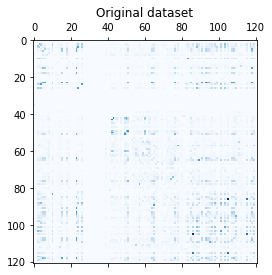

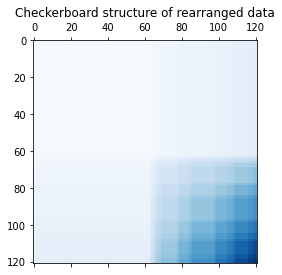

            clusters19
2P_1.pdf            11
2P_10.pdf            1
2P_100.pdf          11
2P_101.pdf           1
2P_102.pdf          13
...                ...
2P_95.pdf            1
2P_96.pdf            1
2P_97.pdf            6
2P_98.pdf            7
2P_99.pdf            1

[121 rows x 1 columns]


In [97]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

data_row = pd.read_csv('result2.csv') 
data = data_row.pivot(index='doc1',columns='doc2',values='cosine').fillna(0)

cloumn_name = 'clusters19'
n_clusters = (19, 19)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")


model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,(rows[:, row_idx], columns[:, col_idx]))

#fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

# plt.matshow(fit_data, cmap=plt.cm.Blues)
# plt.title("After biclustering; rearranged to show biclusters")

plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)

plt.title("Checkerboard structure of rearranged data")

plt.show()

final_result = model.row_labels_.tolist()

final_df = pd.DataFrame(final_result,columns=[cloumn_name], index=data.columns.tolist())
final_df.to_csv(cloumn_name+'.csv')

print (final_df)